In [315]:
import pandas as pd
import numpy as np

In [318]:
#List of possible encoding to try
encodings = ['utf-8','latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'       # Change this to the path of your CSV file


#Attempt to read the CSV file with different encoding

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding : {encoding}")
        break #stop the loop if successful
    except :
        print(f"Failed to read with encoding : {encoding}")
        continue #try the next encoding
        
# If the loop Completes without seccess, df will not be defined
if 'df' in locals():
    print('csv file has been successfully loaded.')
else:
    print("All encoding attempt failed. Unable to read the csv file.")
        
    

Failed to read with encoding : utf-8
File successfully read with encoding : latin1
csv file has been successfully loaded.


In [319]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2889,ham,Shuhui has bought ron's present it's a swatch ...,NaN,NaN,NaN
740,ham,Yes i will be there. Glad you made it.,NaN,NaN,NaN
1021,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,NaN,NaN,NaN
2466,ham,He is world famamus....,NaN,NaN,NaN


In [320]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Data Preprocessing
# 4. Model building 
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [322]:
# Drop Last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [323]:
df.sample(5)

,v1,v2
594,ham,I met you as a stranger and choose you as my f...
5249,ham,"K I'm leaving soon, be there a little after 9"
1913,ham,You want to go?
2650,ham,Do you like shaking your booty on the dance fl...
2853,ham,Haha... Hope Ì_ can hear the receipt sound... ...


In [324]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [325]:
df.sample(5)

,target,text
1485,ham,(I should add that I don't really care and if ...
4990,ham,We made it! Eta at taunton is 12:30 as planned...
1605,ham,When you came to hostel.
2190,ham,"Ooh, 4got, i'm gonna start belly dancing in mo..."
1673,spam,Monthly password for wap. mobsi.com is 391784....


In [326]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [327]:
df['target'] = encoder.fit_transform(df['target']) 
# Here we're encoding target columns values like 'HAM = 0' and 'SPAM = 1'

In [328]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [329]:
#Missing Values

df.isnull().sum()

target    0
text      0
dtype: int64

In [330]:
#check for duplicates values
df.duplicated().sum()

403

In [331]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [332]:
df.duplicated().sum()

0

In [333]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis (EDA)

In [334]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [335]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

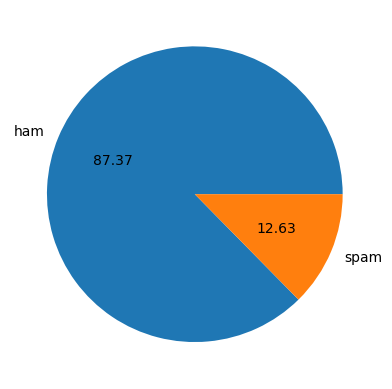

In [336]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
# Big chunk of how and very less spam so out data is not balanced

In [337]:
import nltk

In [22]:
!pip install nltk

In [338]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [339]:
df['num_characters'] = df['text'].apply(len) #number of character

In [340]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [341]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #word count

In [342]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [343]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x))) #sentences

In [344]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [345]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [346]:
#targeting ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [347]:
#targeting spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [348]:
import seaborn as sns

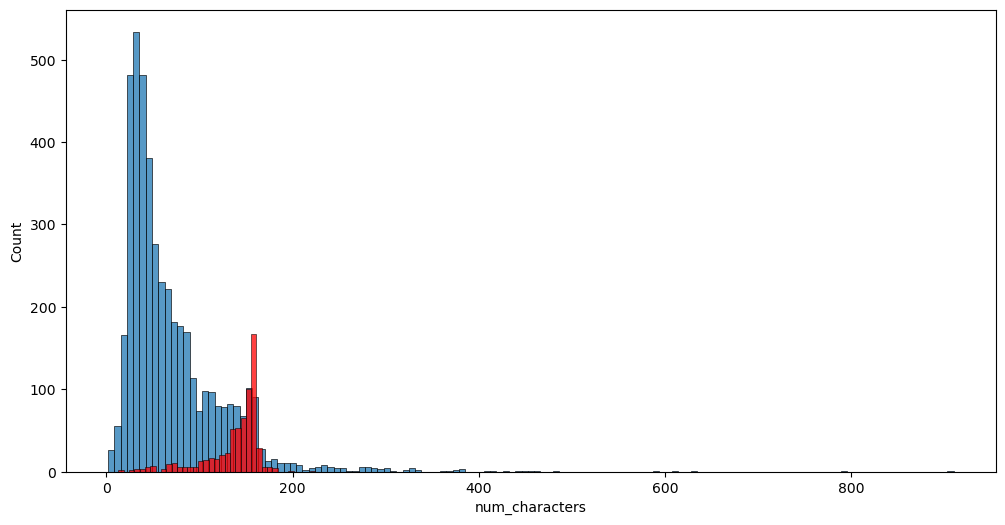

In [349]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red');

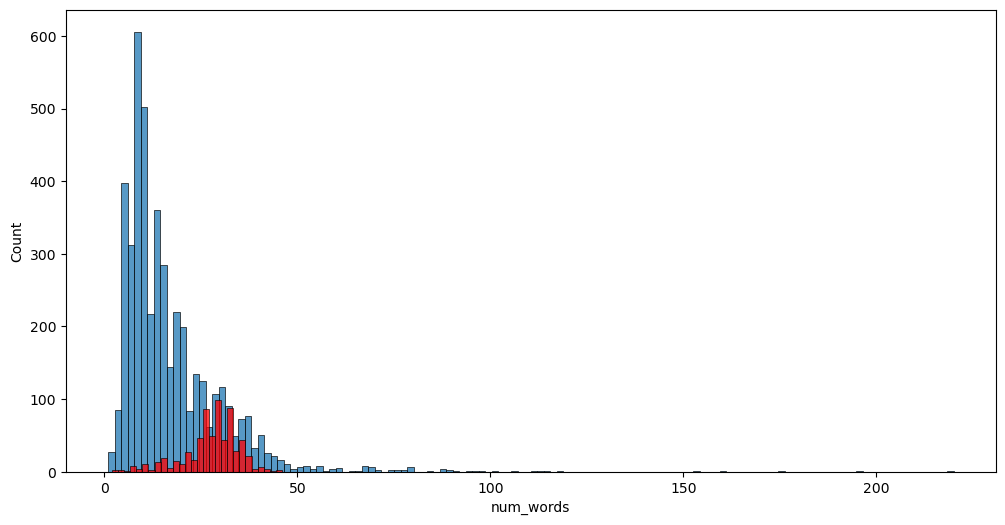

In [350]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red');

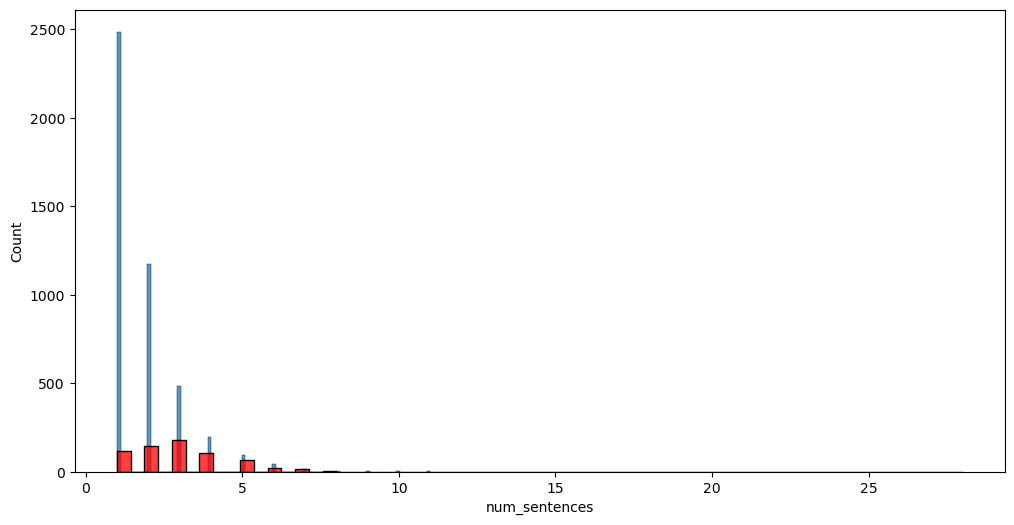

In [351]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red');

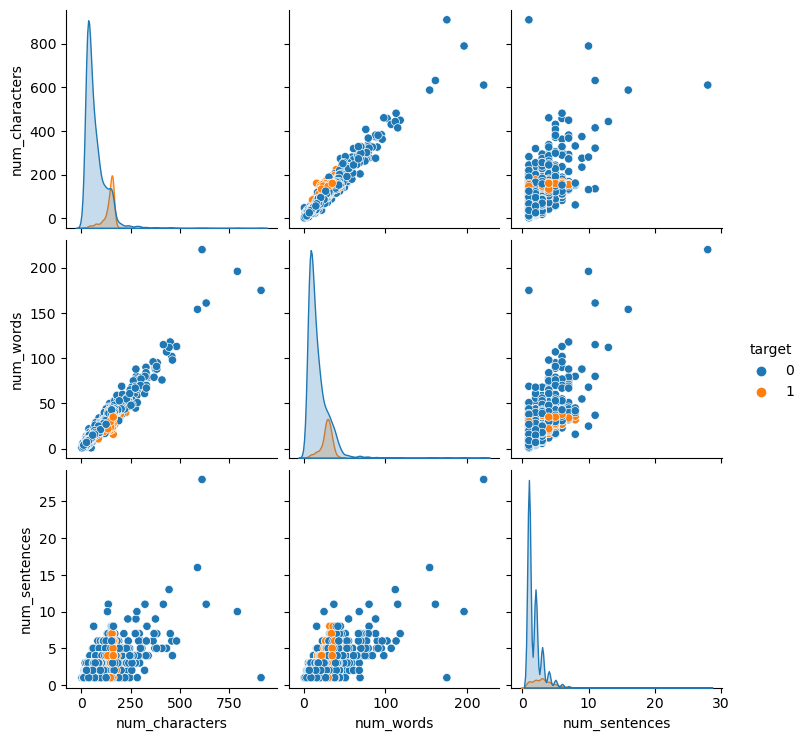

In [352]:
sns.pairplot(df,hue='target');

<Axes: >

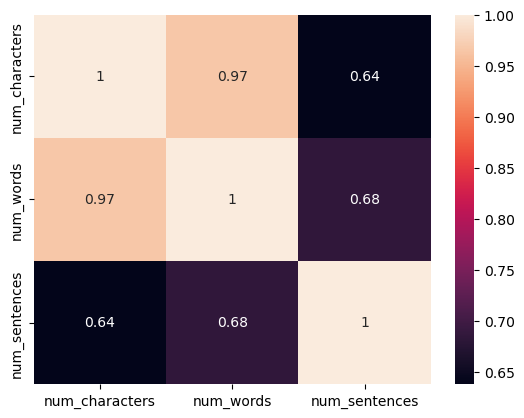

In [353]:
sns.heatmap(df[['num_characters','num_words','num_sentences']].corr(), annot = True)

# 3 Data Preprocessing

-Lower Case :- Convert characters into lowercase

-Tokenization :- Breaking down sentences into words

-Removing special characters :- removing special character to simplify the string

-Removing stop words and punctuation :- removing punctuation and make data reliable to understand machine learning model

-Stemming :- removing the indifferent sense of words like dancing, danced, walking, walked, etc.. and convert in base word like dance, walk such that.

In [354]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
        
    for i in text:
        y.append(ps.stem(i))
            
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried today.")
print(transformed_text)
        

gon na home soon want talk stuff anymor tonight k cri today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [355]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [356]:
#Stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('walking'))
print(ps.stem('gaming'))
print(ps.stem('reading'))

walk
game
read


In [357]:
df['transformed_text'] = df['text'].apply(transform_text)

In [358]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [359]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500,min_font_size=10, background_color='white')

In [360]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

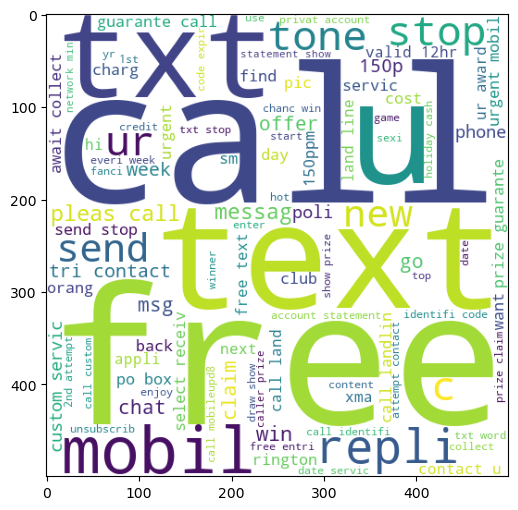

In [361]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc);

In [362]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

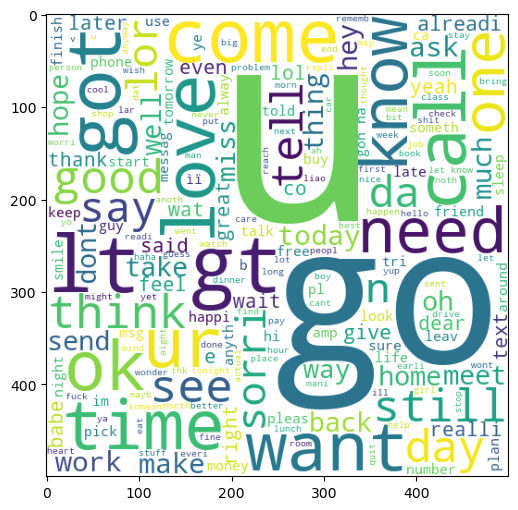

In [363]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc);

In [364]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []

In [365]:
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        #it is used that how many total number of spam words, character we have

In [366]:
len(spam_corpus)

9939

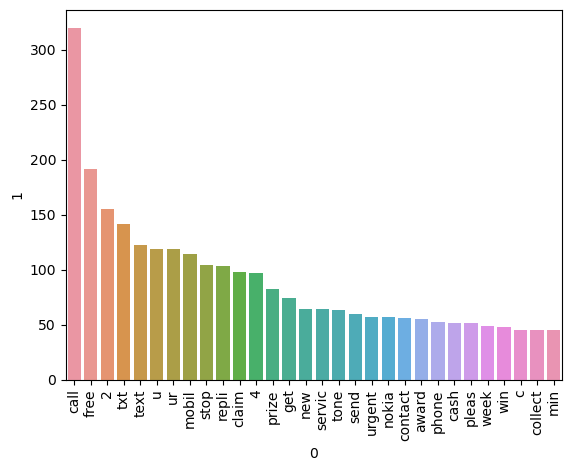

In [367]:
from collections import Counter

#spam_corpus is a list of words
# Count the occurrences of each word
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
top_words_df1 = pd.DataFrame(word_counts.most_common(30))

# Create bar plot
sns.barplot(x=top_words_df1[0], y=top_words_df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [368]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [369]:
len(ham_corpus)

35394

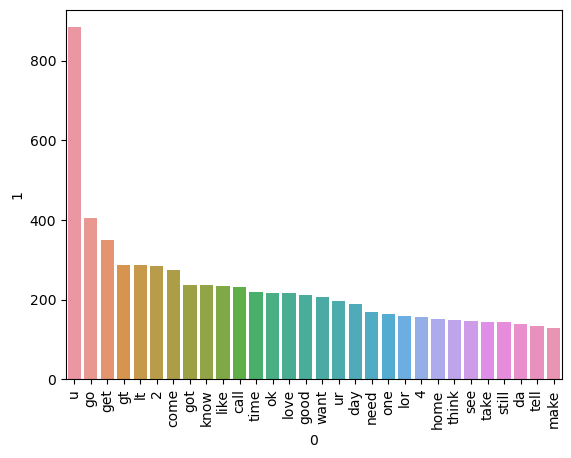

In [370]:
from collections import Counter

#ham_corpus is a list of words
# Count the occurrences of each word
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
top_words_df = pd.DataFrame(word_counts.most_common(30))

# Create bar plot
sns.barplot(x=top_words_df[0], y=top_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [371]:
#Text Vectorization using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4 Building the Model

In [372]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [373]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [ ]:
# append the num_character col to x
# x = np.hstack((x,df['num_character'].values.reshape(-1,1)))

In [374]:
x.shape

(5169, 3000)

In [375]:
y=df['target'].values

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [378]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [379]:
gnb = GaussianNB()
mnb = MultinomialNB() 
bnb =  BernoulliNB()

In [380]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test, y_pred1))
print('precision_score : ',precision_score(y_test, y_pred1))
print('confusion_matrix : \n',confusion_matrix(y_test, y_pred1))

accuracy_score :  0.8694390715667312
precision_score :  0.5068493150684932
confusion_matrix : 
 [[788 108]
 [ 27 111]]


In [381]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test, y_pred2))
print('precision_score : ',precision_score(y_test, y_pred2))
print('confusion_matrix : \n',confusion_matrix(y_test, y_pred2))

accuracy_score :  0.9709864603481625
precision_score :  1.0
confusion_matrix : 
 [[896   0]
 [ 30 108]]


In [382]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test, y_pred3))
print('precision_score : ',precision_score(y_test, y_pred3))
print('confusion_matrix : \n',confusion_matrix(y_test, y_pred3))

accuracy_score :  0.9835589941972921
precision_score :  0.991869918699187
confusion_matrix : 
 [[895   1]
 [ 16 122]]


In [ ]:
# tfidf --> MNB

In [285]:
!pip install xgboost

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [384]:
svc = SVC(kernel ='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [385]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [386]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [387]:
train_classifier(svc,x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [388]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train, y_train, x_test, y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [389]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending = False)

In [390]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [391]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


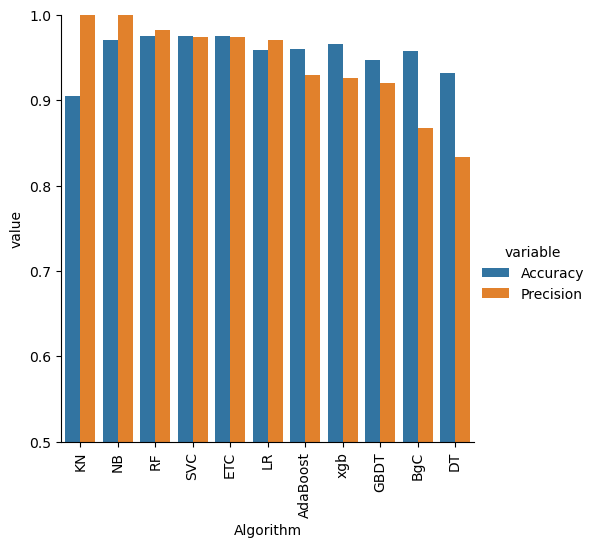

In [392]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable', data=performance_df1, kind='bar', height= 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#model improve
#1. change the max_features parameter of TfIdf

In [394]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [395]:
new_df =performance_df.merge(temp_df, on = 'Algorithm')

In [396]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [397]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_num_chars' : accuracy_scores, 'Precision_num_chars' : precision_scores}).sort_values('Precision_num_chars', ascending = False)

In [398]:
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [399]:
#voting classifier
svc = SVC(kernel='sigmoid', gamma =1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [400]:
voting =  VotingClassifier(estimators=[('svm', svc),('nb', mnb),('et', etc)],voting='soft')

In [401]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [402]:
y_pred = voting.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [403]:
#Applying stacking
estimators = [('svm', svc),('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [404]:
from sklearn.ensemble import StackingClassifier

In [405]:
clf = StackingClassifier(estimators=estimators, final_estimator = final_estimator)

In [406]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [411]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))

In [416]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels (replace with your actual data)
x_train = ['Sample text 1','Sample text 2','Sample text 3']
y_train = [0, 1, 0] #example labels (0 for negative, 1 for positive)

#create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase = True,  stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)

#create and train the Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

#save the trained TF-IDF vectorizer and Naive Bayes Classifier to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)